<a href="https://colab.research.google.com/github/genfre028/1-4HAHA/blob/main/notebooks/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!rm -rf /content/extracted_data
import os
if not os.path.exists("/content/extracted_data"):
    print("[SUCCESS] Folder successfully deleted.")
else:
    print("[FAILED]  Folder still exists.")


✅ Folder successfully deleted.


In [15]:
!rm -rf /root/.cache/huggingface

In [11]:
# Clone repo
!git clone https://github.com/genfre/Glycosense-Non-Invasive-Glucose-Monitoring.git

# Change the current working directory to the cloned folder
%cd Glycosense-Non-Invasive-Glucose-Monitoring

# Verify
!ls

Cloning into 'Glycosense-Non-Invasive-Glucose-Monitoring'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 52 (delta 11), reused 35 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 3.17 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/Glycosense-Non-Invasive-Glucose-Monitoring/hypoglycemia_prediction/Glycosense-Non-Invasive-Glucose-Monitoring/Glycosense-Non-Invasive-Glucose-Monitoring
hypoglycemia_prediction  libs  LICENSE	notebooks  README.md


In [ ]:
# INSTALLATION OF DATASETS (from Kaggle)

!pip install -q kagglehub

import kagglehub
import os

print("[LOGS] Starting downloads...\n")

path_nir = kagglehub.dataset_download("adityaxg/nir-dataset-new")
print(f"[SUCCESS] NIR Dataset downloaded to: {path_nir}")

path_glucose = kagglehub.dataset_download("fatimaafzaal/glucose-level-estimation")
print(f"[SUCCESS] Glucose Estimation Dataset downloaded to: {path_glucose}")

path_d1namo = kagglehub.dataset_download("sarabhian/d1namo-ecg-glucose-data")
print(f"[SUCCESS] D1NAMO Dataset downloaded to: {path_d1namo}")

print(f"\n[INSPECTION] Files in NIR Dataset:")
print(os.listdir(path_nir))

Download already complete (9637799912 bytes).
Extracting files...


In [ ]:
from huggingface_hub import snapshot_download
import os

local_folder = snapshot_download(repo_id="naomikayegarcia/Glycosense", repo_type="dataset")

print(f"Files downloaded to: {local_folder}")

print("\nHere are the files inside the dataset:")
for root, dirs, files in os.walk(local_folder):
    for file in files:
        print(os.path.join(root, file))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

28136294.zip:   0%|          | 0.00/25.0G [00:00<?, ?B/s]

Files downloaded to: /root/.cache/huggingface/hub/datasets--naomikayegarcia--Glycosense/snapshots/21922b4d338c67765b53e289045f9dd7b52084b1

Here are the files inside the dataset:
/root/.cache/huggingface/hub/datasets--naomikayegarcia--Glycosense/snapshots/21922b4d338c67765b53e289045f9dd7b52084b1/.gitattributes
/root/.cache/huggingface/hub/datasets--naomikayegarcia--Glycosense/snapshots/21922b4d338c67765b53e289045f9dd7b52084b1/28136294.zip


In [ ]:
import os

search_dir = "/root/.cache/huggingface"
zip_path = None

print("🔍 Searching for the zip file...")
for root, dirs, files in os.walk(search_dir):
    for file in files:
        if file.endswith(".zip") and "28136294" in file:
            zip_path = os.path.join(root, file)
            break
    if zip_path: break

if zip_path:
    print(f"✅ Found: {zip_path}")
    output_dir = "/content/extracted_data"
    os.makedirs(output_dir, exist_ok=True)

    print("Starting  unzip...")

    # The '!' runs a shell command.
    # -q means 'quiet' (don't print every filename, or it will crash your browser)
    # -o means 'overwrite' without asking
    !unzip -q -o "$zip_path" -d "$output_dir"

    print(f"Finished! Files are in: {output_dir}")
else:
    print("Could not find the zip file.")

🔍 Searching for the zip file...
✅ Found: /root/.cache/huggingface/hub/datasets--naomikayegarcia--Glycosense/snapshots/21922b4d338c67765b53e289045f9dd7b52084b1/28136294.zip
Starting  unzip...
Finished! Files are in: /content/extracted_data


In [ ]:
import shutil
import os

# --- CONFIGURATION ---
# 1. This is the folder you want to KEEP (Your unzipped data)
#    Make sure this matches the folder you extracted into earlier!
my_data_folder = "/content/extracted_data"

# 2. This is the folder you want to DELETE (The hidden Hugging Face cache)
hf_cache_dir = os.path.expanduser("~/.cache/huggingface/hub")
# ---------------------

print(f"🕵️ Safety Check: Looking for your data in '{my_data_folder}'...")

if os.path.exists(my_data_folder) and os.listdir(my_data_folder):
    print(f"✅ CONFIRMED: Your unzipped data is safe in '{my_data_folder}'.")
    print("   (It will NOT be touched.)")

    # Now we proceed to delete the cache
    if os.path.exists(hf_cache_dir):
        print(f"\n🧹 Deleting Hugging Face cache at: {hf_cache_dir} ...")
        try:
            shutil.rmtree(hf_cache_dir)
            print("🎉 SUCCESS! Cache deleted. You reclaimed the disk space.")
            print("   You are now left with JUST the unzipped documents.")
        except Exception as e:
            print(f"❌ Error deleting cache: {e}")
    else:
        print("\n⚠️ Cache folder not found. (It might already be empty/deleted).")

else:
    print(f"\n❌ STOP! I cannot find your unzipped data in '{my_data_folder}'.")
    print("   I will NOT delete the cache yet, because you might lose your files.")
    print("   Please update 'my_data_folder' to the correct path.")

🕵️ Safety Check: Looking for your data in '/content/extracted_data'...
✅ CONFIRMED: Your unzipped data is safe in '/content/extracted_data'.
   (It will NOT be touched.)

🧹 Deleting Hugging Face cache at: /root/.cache/huggingface/hub ...
🎉 SUCCESS! Cache deleted. You reclaimed the disk space.
   You are now left with JUST the unzipped documents.


In [ ]:
import os
import zipfile

# --- CONFIGURATION ---
source_folder = "/content/extracted_data"

print(f"Starting extraction in: {source_folder}\n")

for filename in os.listdir(source_folder):
    file_path = os.path.join(source_folder, filename)

    if filename.endswith("_raw.zip"):
        try:
            os.remove(file_path)
            print(f"🗑️ Deleted RAW file: {filename}")
        except OSError as e:
            print(f"   ⚠️ Error deleting {filename}: {e}")

    # 2. Handle PROCESSED files (Check if already unzipped)
    elif filename.endswith("_processed.zip"):
        expected_folder_name = filename.replace(".zip", "")
        expected_folder_path = os.path.join(source_folder, expected_folder_name)

        # CHECK: Does this folder already exist?
        if os.path.exists(expected_folder_path):
            print(f"⏩ Skipping: {filename} (Folder already exists)")

            # Optional: Delete the zip if the folder exists to save space?
            # os.remove(file_path)

        else:
            # If folder doesn't exist, unzip it
            print(f"📦 Extracting: {filename}")
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(expected_folder_path)

                # Delete zip after successful extraction
                os.remove(file_path)
                print(f"   ✨ Extracted & Removed Zip: {filename}")

            except zipfile.BadZipFile:
                print(f"   ⚠️ Error: {filename} is corrupted.")

print("\n✅ Smart extraction complete!")

Starting extraction in: /content/extracted_data

⏩ Skipping: c1s04_processed.zip (Folder already exists)
⏩ Skipping: c1s01_processed.zip (Folder already exists)
⏩ Skipping: c1s05_processed.zip (Folder already exists)
⏩ Skipping: c2s03_processed.zip (Folder already exists)
📦 Extracting: c1s03_processed.zip
   ✨ Extracted & Removed Zip: c1s03_processed.zip
📦 Extracting: c2s01_processed.zip
   ✨ Extracted & Removed Zip: c2s01_processed.zip
📦 Extracting: c2s05_processed.zip


OSError: [Errno 28] No space left on device

In [ ]:
import os
import sys

# 1. Search for the 'libs' folder starting from the current directory
print(f"Current Working Directory: {os.getcwd()}")
found_libs = False
repo_root = None

for root, dirs, files in os.walk("/content"):
    if "libs" in dirs:
        # Check if 'model.py' is inside libs
        libs_path = os.path.join(root, "libs")
        if "model.py" in os.listdir(libs_path):
            print(f"✅ Found 'libs' package at: {libs_path}")
            repo_root = root
            found_libs = True
            break

# 2. Apply the Fix
if found_libs:
    # Option A: The code exists, but Python couldn't see it.
    print(f"🔄 Adding '{repo_root}' to system path...")
    if repo_root not in sys.path:
        sys.path.append(repo_root)

    # Also change the working directory to the repo root to be safe
    os.chdir(repo_root)
    print(f"📂 Changed working directory to: {os.getcwd()}")

    # Try the import again immediately to verify
    try:
        from libs.model import ECG_Inception
        print("\n🎉 SUCCESS! The module was imported correctly.")
    except ImportError as e:
        print(f"\n❌ Still failing: {e}")

else:
    # Option B: The 'libs' folder is GONE.
    print("\n❌ CRITICAL ERROR: The 'libs' folder cannot be found!")
    print("   You likely accidentally deleted it when cleaning up the data folders.")
    print("   Don't panic! We just need to re-download the code (Repo) without deleting your data.")

Current Working Directory: /content
✅ Found 'libs' package at: /content/Glycosense-Non-Invasive-Glucose-Monitoring/hypoglycemia_prediction/libs
🔄 Adding '/content/Glycosense-Non-Invasive-Glucose-Monitoring/hypoglycemia_prediction' to system path...
📂 Changed working directory to: /content/Glycosense-Non-Invasive-Glucose-Monitoring/hypoglycemia_prediction

🎉 SUCCESS! The module was imported correctly.


In [ ]:
# Install the missing time-series AI library
!pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 656.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49

In [ ]:
subject_id = 'c1s01'
version = 'v1'
data_type = 'eda'
config_dir = '../configs'
data_dir = '../data'

In [ ]:
import os
import yaml

# 1. Define the correct path based on your search results
repo_root = "/content/Glycosense-Non-Invasive-Glucose-Monitoring"
# The configs are hiding inside 'hypoglycemia_prediction'
config_dir = os.path.join(repo_root, "hypoglycemia_prediction", "configs")

data_type = "eda"  # or 'ecg' / 'ppg' depending on what you are running

# 2. Build the full path
file_path = os.path.join(config_dir, f"{data_type}.yaml")

print(f"📂 Loading config from: {file_path}")

# 3. Load the file
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        config = yaml.safe_load(f)
    print("✅ Success! Config loaded.")
else:
    print("❌ Error: File still not found. Check the path above.")

📂 Loading config from: /content/Glycosense-Non-Invasive-Glucose-Monitoring/hypoglycemia_prediction/configs/eda.yaml
✅ Success! Config loaded.


In [ ]:
print(f"Config: {config}")

Config: {'batch_size': 128, 'lr': 0.0005, 'epochs': 1000, 'patience': 200}


In [ ]:
import pandas as pd
import json
import os

# --- 1. CONFIGURATION FIXES ---
# Point to where your files actually are
data_dir = '/content/extracted_data'

# Update the subject ID to match your actual folder name (c1s01_processed)
subject_id = 'c1s01_processed'

# Ensure data_type is defined (it looks like you want 'eda')
data_type = 'eda'
# -----------------------------

# Construct the full paths
data_path = f'{data_dir}/{subject_id}/{data_type}.pkl'
metadata_path = f'{data_dir}/{subject_id}/metadata.json'

print(f"📂 Attempting to load: {data_path}")

# Check if the file exists before crashing
if os.path.exists(data_path):
    # Load the data
    data = pd.read_pickle(data_path)

    # Load the metadata
    if os.path.exists(metadata_path):
        with open(metadata_path, 'r') as f:
            metadata = json.load(f)
    else:
        print("⚠️ Warning: Metadata file not found (skipping metadata load).")

    print("✅ Success! Data loaded.")
    print(data.head())
else:
    print(f"❌ Error: File not found at {data_path}")
    print("   Double check that you didn't delete the 'extracted_data' folder!")
    print(f"   Files currently in {data_dir}:")
    # List folders to help debug
    if os.path.exists(data_dir):
        print(os.listdir(data_dir))

📂 Attempting to load: /content/extracted_data/c1s01_processed/eda.pkl
❌ Error: File not found at /content/extracted_data/c1s01_processed/eda.pkl
   Double check that you didn't delete the 'extracted_data' folder!
   Files currently in /content/extracted_data:
['c1s04_processed.zip', 'c1s01_processed', 'c1s01_processed.zip', 'c1s05_processed.zip', 'c2s03_processed.zip', 'c2s05_processed.zip', 'c2s02_processed.zip', 'c2s04_processed.zip']


In [ ]:
import pandas as pd
import os
import glob

# Configuration
data_dir = '/content/extracted_data'
subject_id = 'c1s01_processed'
folder_path = os.path.join(data_dir, subject_id)

# Get just one file to test
first_file = glob.glob(os.path.join(folder_path, "*.pkl"))[0]

print(f"🕵️ Inspecting file: {first_file}")
data_chunk = pd.read_pickle(first_file)

print(f"\nType: {type(data_chunk)}")

if isinstance(data_chunk, dict):
    print("\n🔑 FOUND KEYS (What is inside the dictionary):")
    for key in data_chunk.keys():
        print(f"   - '{key}'")
        # Show a sneak peek of what's inside that key
        try:
            print(f"     Type: {type(data_chunk[key])}")
        except:
            pass
else:
    print("It is not a dictionary. Something else is happening.")

🕵️ Inspecting file: /content/extracted_data/c1s01_processed/1865.pkl

Type: <class 'dict'>

🔑 FOUND KEYS (What is inside the dictionary):
   - 'Index'
     Type: <class 'numpy.float64'>
   - 'Timestamp'
     Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
   - 'glucose'
     Type: <class 'numpy.float64'>
   - 'zephyr'
     Type: <class 'dict'>
   - 'e4'
     Type: <class 'dict'>


In [ ]:
import pandas as pd
import glob
import os

# --- Load one file again to check 'e4' ---
data_dir = '/content/extracted_data'
subject_id = 'c1s01_processed'
folder_path = os.path.join(data_dir, subject_id)
first_file = glob.glob(os.path.join(folder_path, "*.pkl"))[0]

data_chunk = pd.read_pickle(first_file)
e4_data = data_chunk['e4']

print(f"🕵️ Inside 'e4' dictionary:")
print(f"   Keys: {e4_data.keys()}")

# Check if 'eda' or 'EDA' is there
if 'eda' in e4_data:
    print(f"   ✅ Found 'eda' data! Type: {type(e4_data['eda'])}")
    print(f"   Sample value: {e4_data['eda']}")
elif 'EDA' in e4_data:
    print(f"   ✅ Found 'EDA' data! Type: {type(e4_data['EDA'])}")
else:
    print("   ❌ No EDA key found. We might need to look in 'zephyr'?")

🕵️ Inside 'e4' dictionary:
   Keys: dict_keys(['ACC', 'HR', 'BVP', 'EDA', 'TEMP'])
   ✅ Found 'EDA' data! Type: <class 'dict'>


In [ ]:
import pandas as pd
import glob
import os
from tqdm import tqdm  # This gives you a progress bar

# --- CONFIGURATION ---
data_dir = '/content/extracted_data'
subject_id = 'c1s01_processed'
folder_path = os.path.join(data_dir, subject_id)
# ---------------------

# 1. Find and sort the files
pkl_files = glob.glob(os.path.join(folder_path, "*.pkl"))

# Try sorting numerically (1.pkl, 2.pkl) so time stays in order
try:
    pkl_files.sort(key=lambda x: int(os.path.basename(x).split('.')[0]))
except:
    pkl_files.sort()

print(f"📂 Found {len(pkl_files)} segments. Starting merge...")

# 2. Load and Flatten
data_list = []

for file_path in tqdm(pkl_files):
    try:
        # Load the raw dictionary
        chunk = pd.read_pickle(file_path)

        # 'pd.json_normalize' works magic here:
        # It turns {'e4': {'EDA': {'val': 5}}} into columns like "e4.EDA.val"
        flat_chunk = pd.json_normalize(chunk)

        data_list.append(flat_chunk)
    except Exception as e:
        pass # Skip any corrupted files

# 3. Concatenate into one big dataframe
if data_list:
    data = pd.concat(data_list, ignore_index=True)

    print(f"\n🎉 SUCCESS! All files merged.")
    print(f"Total Shape: {data.shape} (Rows, Columns)")

    print("\n🔎 Here are your EDA columns:")
    # Filter to show only columns related to EDA
    eda_cols = [c for c in data.columns if 'EDA' in c]
    print(eda_cols)

    display(data[eda_cols].head())
else:
    print("❌ Failed to load any data.")

📂 Found 2704 segments. Starting merge...


100%|██████████| 2704/2704 [00:56<00:00, 47.71it/s]



🎉 SUCCESS! All files merged.
Total Shape: (2704, 30) (Rows, Columns)

🔎 Here are your EDA columns:
['e4.EDA.Time', 'e4.EDA.EDA']


,e4.EDA.Time,e4.EDA.EDA
0,"[2022-06-08T13:32:45.500000000, 2022-06-08T13:...","[0.201181, 0.207588, 0.206307, 0.20887, 0.2178..."
1,"[2022-06-08T13:33:48.250000000, 2022-06-08T13:...","[0.28191, 0.283191, 0.285754, 0.287035, 0.2870..."
2,"[2022-06-08T13:38:47.250000000, 2022-06-08T13:...","[0.230654, 0.230654, 0.230654, 0.231935, 0.231..."
3,"[2022-06-08T13:43:48.250000000, 2022-06-08T13:...","[0.330603, 0.330603, 0.330603, 0.330603, 0.330..."
4,"[2022-06-08T13:48:48.250000000, 2022-06-08T13:...","[0.319071, 0.321633, 0.326759, 0.326759, 0.329..."


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# ==========================================
# 1. STANDARDIZE SEQUENCE LENGTHS
# ==========================================
print("🔄 Standardizing Sequence Lengths...")

# Get the raw list of arrays
raw_sequences = data['e4.EDA.EDA'].values

# Calculate statistics to find a good target length
lengths = [len(seq) for seq in raw_sequences]
median_len = int(np.median(lengths))
print(f"   Min length: {min(lengths)}")
print(f"   Max length: {max(lengths)}")
print(f"   Median length: {median_len} (We will standardize to this)")

# TARGET LENGTH: You can change this manually if you want (e.g., 240)
TARGET_LEN = median_len

cleaned_sequences = []

for seq in raw_sequences:
    seq_len = len(seq)

    if seq_len == TARGET_LEN:
        # Perfect match
        new_seq = seq
    elif seq_len > TARGET_LEN:
        # Too long? TRUNCATE (Keep the first N points)
        new_seq = seq[:TARGET_LEN]
    else:
        # Too short? PAD (Add zeros to the end)
        # Create an array of zeros and paste the data into it
        new_seq = np.zeros(TARGET_LEN)
        new_seq[:seq_len] = seq

    cleaned_sequences.append(new_seq)

# Now we can safely stack them because they are all the same size
X_raw = np.vstack(cleaned_sequences)

# ==========================================
# 2. PREPARE FOR MODEL
# ==========================================
print(f"✅ Data Stacked! Shape: {X_raw.shape}")

# Extract Target
y_raw = data['glucose'].values

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw.T).T

# Convert to Tensor (Batch, Channels, Sequence)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_raw, dtype=torch.float32).unsqueeze(1)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Loaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print("🚀 Ready for training! (Run the model definition/training block next)")

🔄 Standardizing Sequence Lengths...
   Min length: 0
   Max length: 1208
   Median length: 1199 (We will standardize to this)
✅ Data Stacked! Shape: (2704, 1199)
🚀 Ready for training! (Run the model definition/training block next)


🚀 Model initialized on cpu
   Input Length: 1199

Starting training for 100 epochs...
Epoch 0/100 | Train MSE: 5802.08 | Val MSE: 2813.20
Epoch 10/100 | Train MSE: 1107.60 | Val MSE: 1556.00
Epoch 20/100 | Train MSE: 724.93 | Val MSE: 1693.68
Epoch 30/100 | Train MSE: 591.88 | Val MSE: 1769.90
Epoch 40/100 | Train MSE: 563.00 | Val MSE: 1836.19
Epoch 50/100 | Train MSE: 526.55 | Val MSE: 1836.34
Epoch 60/100 | Train MSE: 522.75 | Val MSE: 1840.95
Epoch 70/100 | Train MSE: 483.62 | Val MSE: 1853.82
Epoch 80/100 | Train MSE: 484.63 | Val MSE: 1862.60
Epoch 90/100 | Train MSE: 479.83 | Val MSE: 1849.55

🎉 Training Complete! Best Validation MSE: 1454.09


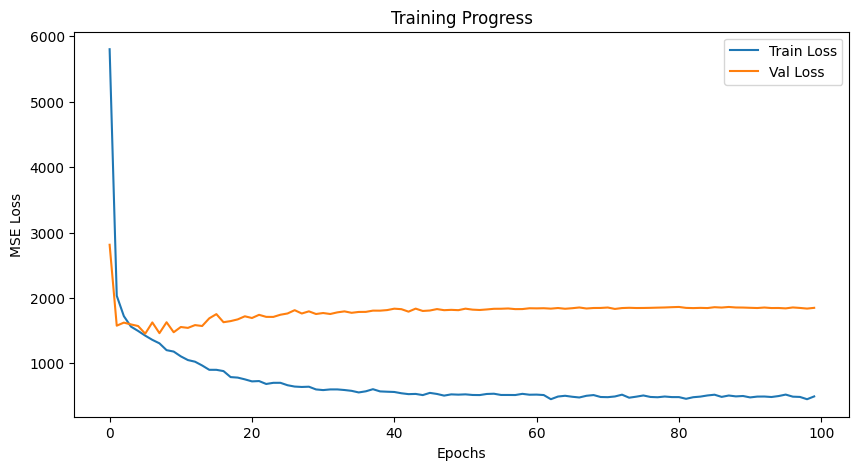

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import copy

# ==========================================
# 1. DEFINE THE MODEL
# ==========================================
class GlucoseMonitorNet(nn.Module):
    def __init__(self, input_length):
        super(GlucoseMonitorNet, self).__init__()

        # 1D CNN: Great for finding patterns in signals (EDA or Spectroscopy)
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.MaxPool1d(2), # Reduces length by half

            # Conv Block 2
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2),

            # Conv Block 3 (Deeper for complex patterns)
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2)
        )

        # Calculate Flatten Size Dynamically
        # We pass a fake zero-tensor through the conv layers to see the output size
        dummy_input = torch.zeros(1, 1, input_length)
        with torch.no_grad():
            dummy_out = self.features(dummy_input)

        self.flatten_size = dummy_out.view(1, -1).size(1)

        # Regression Head
        self.regressor = nn.Sequential(
            nn.Linear(self.flatten_size, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1) # Outputs the single Glucose value
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1) # Flatten
        x = self.regressor(x)
        return x

# Initialize
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use the length from your "Standardized" step (1199)
input_len = X_train.shape[2]
model = GlucoseMonitorNet(input_length=input_len).to(device)

print(f"🚀 Model initialized on {device}")
print(f"   Input Length: {input_len}")


# ==========================================
# 2. TRAIN THE MODEL
# ==========================================
criterion = nn.MSELoss() # Mean Squared Error (Standard for Regression)
optimizer = optim.Adam(model.parameters(), lr=0.0005) # Lower LR for stability
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5)

epochs = 100
best_val_loss = float('inf')
history = {'train_loss': [], 'val_loss': []}

print(f"\nStarting training for {epochs} epochs...")

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    val_loss = val_loss / len(val_loader.dataset)

    # Store history
    history['train_loss'].append(epoch_loss)
    history['val_loss'].append(val_loss)
    scheduler.step(val_loss)

    # Save Best Model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_glucose_model.pth')

    # Print update every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} | Train MSE: {epoch_loss:.2f} | Val MSE: {val_loss:.2f}")

# ==========================================
# 3. VISUALIZE RESULTS
# ==========================================
print(f"\n🎉 Training Complete! Best Validation MSE: {best_val_loss:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Training Progress')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()